In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
files = pd.DataFrame()

for filename in os.listdir("tickerData"):
    if filename.endswith(".txt"):
        x = pd.read_csv("tickerData/"+filename)
        x.columns = [y.replace(" ", "") for y in x.columns]
        x['TICKER'] = filename[:-4]
        files = pd.concat([files,x], ignore_index=True)
        

In [3]:
files['DATE']  = pd.to_datetime(files['DATE'].astype('str'), format = "%Y/%m/%d")

In [4]:
tempcash = files[files['TICKER'] == 'CASH'].drop('DATE', axis = 1)
cash = files[['DATE']].copy().drop_duplicates()

for col in tempcash.columns:
    cash[col] = tempcash[col][0]
    
files = pd.concat([files[files['TICKER'] != 'CASH'], cash])

In [5]:
files

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO,TICKER
1,1990-01-02,77300.0,77400.0,77020.0,77020.0,1.250000e+02,2559.0,0.0,0.0,0.0,F_AD
2,1990-01-03,76890.0,77030.0,76700.0,76740.0,1.495000e+03,3215.0,0.0,0.0,0.0,F_AD
3,1990-01-04,77080.0,77610.0,77000.0,77490.0,9.320000e+02,3122.0,0.0,0.0,0.0,F_AD
4,1990-01-05,77050.0,77280.0,76980.0,76980.0,2.720000e+02,2542.0,0.0,0.0,0.0,F_AD
5,1990-01-08,77280.0,77300.0,77090.0,77200.0,1.770000e+02,2430.0,0.0,0.0,0.0,F_AD
...,...,...,...,...,...,...,...,...,...,...,...
479691,1998-03-22,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
479748,1998-06-21,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
564314,1989-05-01,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH
564397,1989-08-28,1.0,1.0,1.0,1.0,1.000000e+11,0.0,0.0,0.0,0.0,CASH


In [6]:
files = files.sort_values(['DATE','TICKER'])
files['perc_return'] = files.groupby('TICKER').CLOSE.apply(pd.Series.pct_change)

In [7]:
t = files[files['DATE'] < '2021-01-01']

In [8]:
c = t[['TICKER','DATE','CLOSE']].pivot(columns = 'TICKER',index='DATE',values='CLOSE').corr()

In [38]:
c = c.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

corrs = pd.DataFrame(so).dropna()
corrs[corrs[0] != 1].drop_duplicates(0).tail(200)

0
TICKER TICKER          
F_US   F_RF    0.899055
F_SH   F_NQ    0.899545
F_FM   F_SX    0.899568
       F_DZ    0.899586
F_W    F_BO    0.900357
...                 ...
F_HO   F_BC    0.995543
F_RU   F_MD    0.996040
F_BC   F_BG    0.996411
F_HP   F_NG    0.998636
F_HO   F_BG    0.998653

[200 rows x 1 columns]

In [42]:
# # plot ratio between F_NG and F_HP

# ng = t[t['TICKER']=='F_N'].reset_index()
# hp = t[t['TICKER']=='F_HP'].reset_index()

bc = t[t['TICKER']=='F_W'].reset_index()
bg = t[t['TICKER']=='F_BO'].reset_index()


ec = t[t['TICKER']=='F_EC'].reset_index()
dx = t[t['TICKER']=='F_DX'].reset_index()

In [91]:
import matplotlib.pyplot as plt

In [43]:
x1 = bg.set_index('DATE').CLOSE/bc.set_index('DATE').CLOSE
x1 = x1.dropna()
x1.mean()

0.7986406815909662

In [29]:
x2 = ec.set_index('DATE').CLOSE/dx.set_index('DATE').CLOSE
x2 = x2.dropna()
x2.mean()

1.6944520278408013

In [14]:
import matplotlib.pyplot as plt

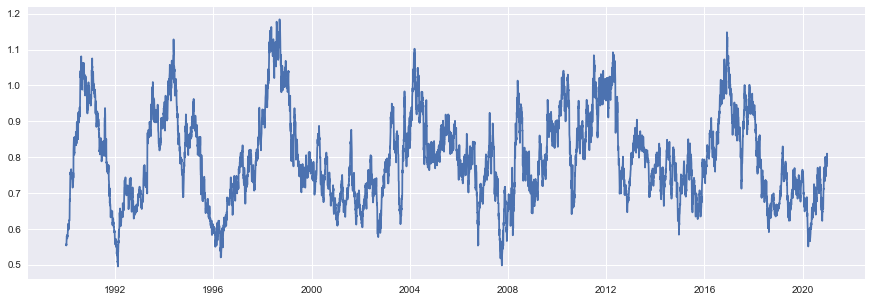

In [44]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))

#plt.plot(ng.DATE, ng.CLOSE/hp.CLOSE)
#plt.plot(bg.DATE, bg.CLOSE/ho.CLOSE, )
plt.plot(x1)
#plt.plot(x2)
#plt.legend(['ng-hp','bg-ho','bg-bc'])

In [117]:
x = pd.DataFrame( index= bg.DATE).reset_index()
x['ratio'] = bg.CLOSE/bc.CLOSE

In [120]:
x[x['DATE'] == '2012-03-21']

,DATE,ratio
6548,2012-03-21,1.812048


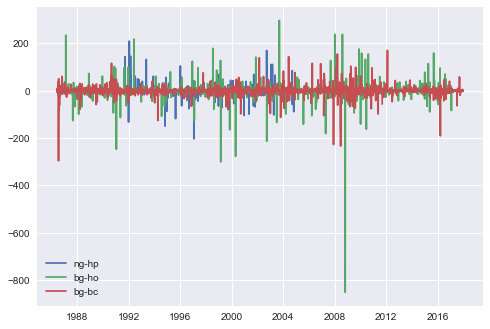

In [103]:
plt.plot(ng.DATE, ng.perc_return/hp.perc_return)
plt.plot(bg.DATE, bg.perc_return/ho.perc_return)
plt.plot(bg.DATE, bg.perc_return/bc.perc_return)
plt.legend(['ng-hp','bg-ho','bg-bc'])

In [ ]:
#red and green are mean reverting to 1

upper_threshold  = 0.5
lower_threshold = 0.2

#for red:

pos = np.zeros(nMarkets)

for i in range(0, nMarkets - 1):
    future_name = markets[i + 1]
    if future_name == 'F_BG':
        close =  np.transpose(CLOSE)[i]
        fbg_price = close[0]
        fbg_i = i
    if future_name == 'F_BC':
        close =  np.transpose(CLOSE)[i]
        fbc_price = close[0]
        fbc_i = i
    
if fbg_price/fbc_price >1 + upper_threshold:
    #short fbg long fbc
    weights = pos
    weights[fbc_i] = 1
    weights[fbg_i] = -1
    
elif fbg_price/fbc_price < 1- lower_threshold:
    #long fbg short fbc
    weights = pos
    weights[fbc_i] = -1
    weights[fbg_i] = 1
    
return weights
    
    
        
        
        

# if > 1, bg overpriced compared to bc






# if < 1, bc overpriced compared to bg